# Assignment 4. Deep Learning

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

*For questions 1 refer to @alino_9 on Telegram.*

### Description  
This homework consists of four questions, each aimed at one category in the world of Deep Learning.   
1. Getting familiarized with sentiment analysis (A subject also covered in the course project).
   
2. Multi-layer perceptron (MLP). 
   
3. Convolutional Neural Networks (CNN).
   
4. Variational Autoencoders (VAE).

### Information  
Complete the information box below.

In [ ]:
full_name = 'Hadi Hadavi'
student_id = '99100263'

### Note
The questions are not necessarily in order of difficulty. You are obligated to answer **3 out of 4** questions. The fourth question is optional and is considered as bonus.

## 1 Twitter Sentiment Analysis

In [75]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import re

### 1.1 Load and Visualize Dataset

In [8]:
## Load dataset and print the length of train and test
train = pd.read_csv("train-tweets.csv")
test = pd.read_csv("test-tweets.csv")

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [9]:
# Show some samples of train set and test set
print(train.head())
print(test.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
      id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...


In [10]:
# Check if there is any null value in train and test

# Check for null values in train DataFrame
train_null_values = train.isnull().sum()

# Check for null values in test DataFrame
test_null_values = test.isnull().sum()

# Display the results
print("Null values in train DataFrame:")
print(train_null_values)

print("\nNull values in test DataFrame:")
print(test_null_values)

Null values in train DataFrame:
id       0
label    0
tweet    0
dtype: int64

Null values in test DataFrame:
id       0
tweet    0
dtype: int64


In [54]:
# Show 10 negative comments from train set

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the "tweet" column in train DataFrame
train['sentiment'] = train['tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Apply sentiment analysis to the "tweet" column in test DataFrame
test['sentiment'] = test['tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Function to get sentiment label based on compound score
def get_sentiment_label(compound_score):
    if compound_score > 0:
        return 'positive'
    elif compound_score < 0:
        return 'negative'
    else:
        return 'neutral'
    
# Apply sentiment label to the "sentiment" column in train DataFrame
train['sentiment_label'] = train['sentiment'].apply(get_sentiment_label)
test['sentiment_label'] = test['sentiment'].apply(get_sentiment_label)

# Filter 10 negative comments from the train set
negative_comments = train[train['sentiment_label'] == 'negative']['tweet'].head(10)

# Display the negative comments
print("10 Negative Comments from Train Set:")
for index, comment in enumerate(negative_comments, start=1):
    print(f"{index}. {comment}")

10 Negative Comments from Train Set:
1.  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
2. [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  
3. we are so selfish. #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking   #values #love #
4. no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins
5. sad little dude..   #badday #coneofshame #cats #pissed #funny #laughs 
6. i have never had a chance to vote for a presidential candidate i was excited about and this cycle looks to be no different.  
7. it was a hard monday due to cloudy weather. disabling oxygen production for today. #goodnight #badmonday  
8. #taylorswift1989   bull up: you will dominate your bull and you will direct it whatever you want it to do. w 
9. oh, #cedarpoint. waited 2 hours in the valravn line and it stopped

In [13]:
# Show 10 positive comments from train set

# Filter 10 positive comments from the train set
positive_comments = train[train['sentiment_label'] == 'positive']['tweet'].head(10)

# Display the positive comments
print("10 Positive Comments from Train Set:")
for index, comment in enumerate(positive_comments, start=1):
    print(f"{index}. {comment}")

10 Positive Comments from Train Set:
1. @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
2. #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
3. we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦ 
4.  @user @user welcome here !  i'm   it's so #gr8 ! 
5. i am thankful for having a paner. #thankful #positive     
6. retweet if you agree! 
7. its #friday! ð smiles all around via ig user: @user #cookies make people   
8. #euro2016 people blaming ha for conceded goal was it fat rooney who gave away free kick knowing bale can hit them from there.  
9. product of the day: happy man #wine tool  who's   it's the #weekend? time to open up &amp; drink up!
10. beautiful sign by vendor 80 for $45.00!! #upsideofflorida #shopalyssas   #love 


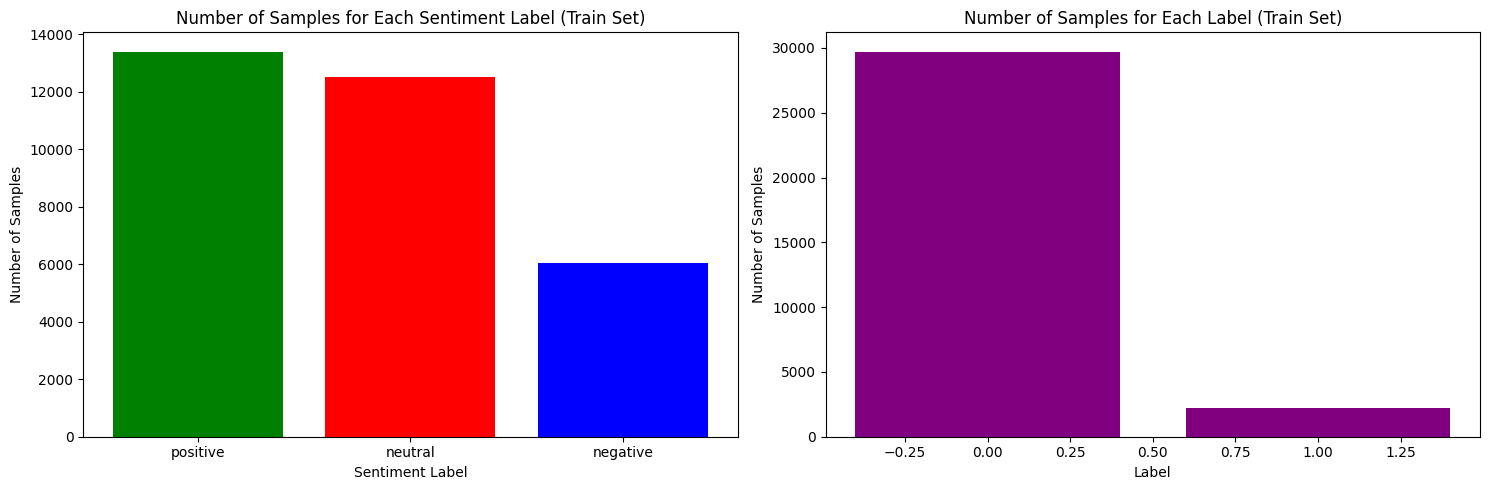

In [15]:
# Using barplot plot the number of samples for each label in train set

# Count the number of samples for each sentiment label
sentiment_label_counts = train['sentiment_label'].value_counts()

# Count the number of samples for each label
label_counts = train['label'].value_counts()

# Plot the bar charts side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot for sentiment labels
axes[0].bar(sentiment_label_counts.index, sentiment_label_counts, color=['green', 'red', 'blue'])
axes[0].set_title('Number of Samples for Each Sentiment Label (Train Set)')
axes[0].set_xlabel('Sentiment Label')
axes[0].set_ylabel('Number of Samples')

# Plot for another column "label"
axes[1].bar(label_counts.index, label_counts, color='purple')
axes[1].set_title('Number of Samples for Each Label (Train Set)')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Number of Samples')

plt.tight_layout()
plt.show()

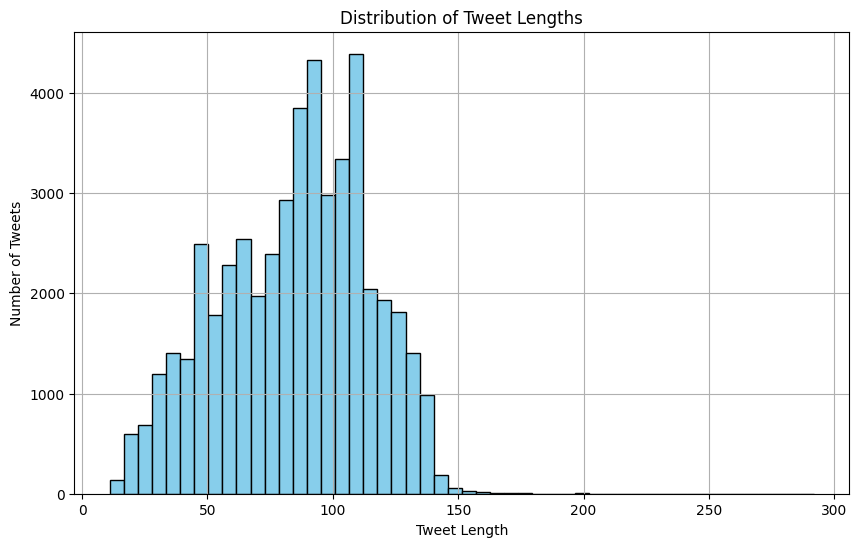

In [16]:
# Plot the distribution of tweets' length in the data (both train and test in one figure)

# Combine train and test DataFrames
combined_data = pd.concat([train, test], ignore_index=True)

# Get the length of each tweet
combined_data['tweet_length'] = combined_data['tweet'].apply(len)

# Plot the distribution of tweet lengths
plt.figure(figsize=(10, 6))
plt.hist(combined_data['tweet_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

In [17]:
# Add a column to represent the length of the tweet
train['len'] = train['tweet'].apply(len)
test['len'] = train['tweet'].apply(len)

In [18]:
train.head(5)

,id,label,tweet,sentiment,sentiment_label,len
0,1,0,@user when a father is dysfunctional and is s...,-0.8296,negative,102
1,2,0,@user @user thanks for #lyft credit i can't us...,0.6705,positive,122
2,3,0,bihday your majesty,0.0000,neutral,21
3,4,0,#model i love u take with u all the time in ...,0.7249,positive,86
4,5,0,factsguide: society now #motivation,0.0000,neutral,39


In [19]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

               sentiment            ...                      len             \
           max     count      mean  ...     75%     max    count       mean   
label                               ...                                       
0      31962.0   29720.0  0.158544  ...  0.5267  0.9851  29720.0  84.328634   
1      31961.0    2242.0 -0.083628  ...  0.1511  0.9037   2242.0  90.187779   

                                                  
             std   min   25%   50%    75%    max  
label                                             
0      29.566484  11.0  62.0  88.0  107.0  274.0  
1      27.375502  12.0  69.0  96.0  111.0  152.0  

[2 rows x 24 columns]

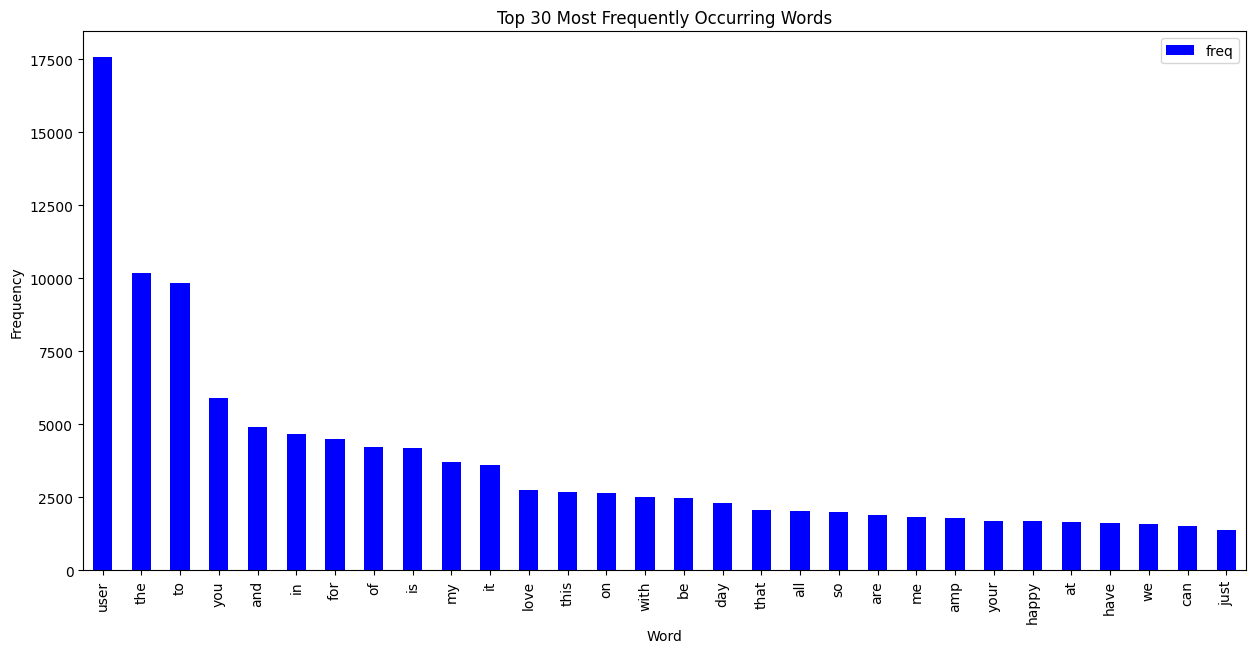

In [21]:
# Find top 30 most frequency words in the train set
# hint: you can use CountVectorizer from sklearn

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'tweet' column
X = vectorizer.fit_transform(train['tweet'])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Sum the counts of each word
word_counts = X.sum(axis=0)

# Create a DataFrame with word frequencies
words_freq = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

# Sort the DataFrame by frequency in descending order
frequency = frequency.sort_values(by='freq', ascending=False)

# Plot the top 30 most frequent words
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color='blue')
plt.title("Top 30 Most Frequently Occurring Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

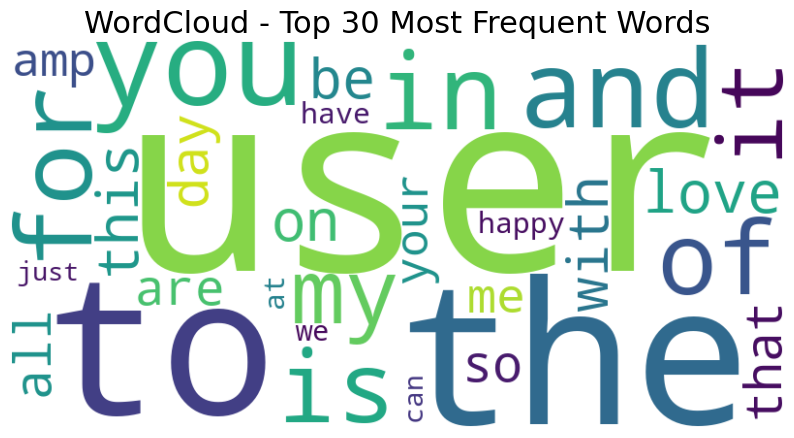

In [22]:
# plot the WordCloud for top 30 words
from wordcloud import WordCloud


# Get the top 30 words
top_30_words = frequency.head(30)

# Create a dictionary from the DataFrame for WordCloud
wordcloud_dict = dict(zip(top_30_words['word'], top_30_words['freq']))

# Initialize WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WordCloud - Top 30 Most Frequent Words", fontsize=22)
plt.axis('off')
plt.show()

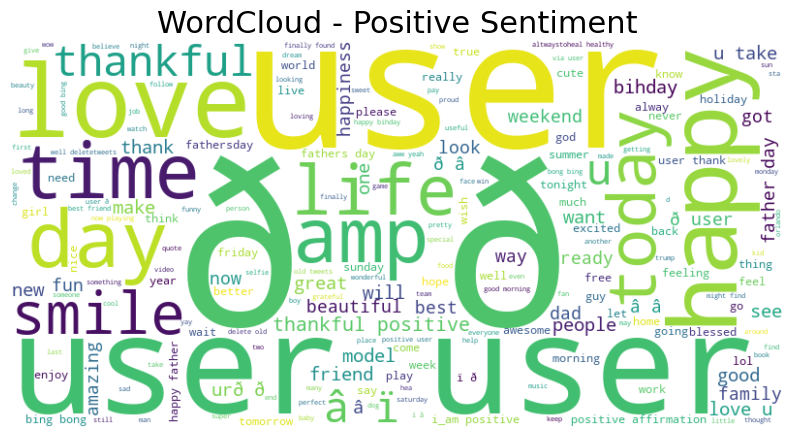

In [26]:
# plot the WordCloud for all words with positive label

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment label for each word
def get_word_sentiment_label(word):
    polarity = sid.polarity_scores(word)['compound']
    return 'positive' if polarity > 0 else 'negative' if polarity < 0 else 'neutral'

# Apply the sentiment label function to each word in the 'tweet' column
train['word_sentiment_label'] = train['tweet'].apply(lambda x: get_word_sentiment_label(x))

# Filter words with a positive sentiment label
positive_words = train[train['word_sentiment_label'] == 'positive']['tweet']

# Combine positive words into a single string
positive_text = ' '.join(positive_words)

# Initialize WordCloud
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("WordCloud - Positive Sentiment", fontsize=22)
plt.axis('off')
plt.show()

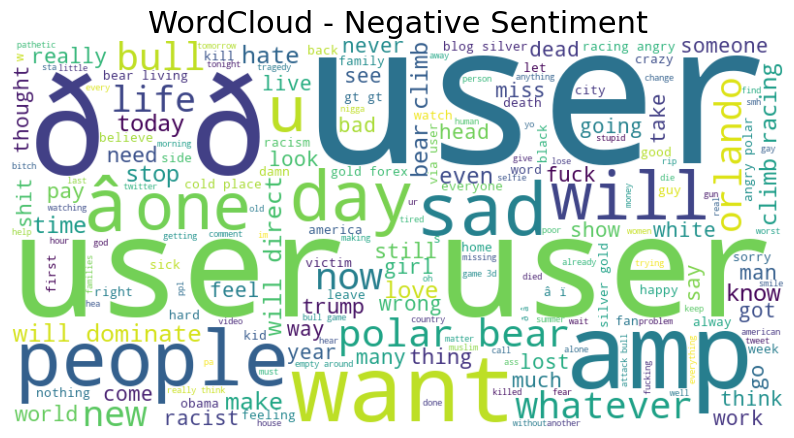

In [27]:
# plot the WordCloud for all words with negative label

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment label for each word
def get_word_sentiment_label(word):
    polarity = sid.polarity_scores(word)['compound']
    return 'positive' if polarity > 0 else 'negative' if polarity < 0 else 'neutral'

# Apply the sentiment label function to each word in the 'tweet' column
train['word_sentiment_label'] = train['tweet'].apply(lambda x: get_word_sentiment_label(x))

# Filter words with a negative sentiment label
negative_words = train[train['word_sentiment_label'] == 'negative']['tweet']

# Combine negative words into a single string
negative_text = ' '.join(negative_words)

# Initialize WordCloud
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("WordCloud - Negative Sentiment", fontsize=22)
plt.axis('off')
plt.show()

In [29]:
# Define a function to extract the hashtags
# The output must be a list of hashtags

def hashtag_extract(text):
    hashtags = re.findall(r'\#\w+', text)
    return hashtags

In [30]:
# extract hashtags from non racist/sexist (positive or neutral) tweets

# Apply the hashtag_extract function to the 'tweet' column for positive and neutral tweets
positive_neutral_tweets = train[train['sentiment_label'].isin(['positive', 'neutral'])]
HT_regular = positive_neutral_tweets['tweet'].apply(hashtag_extract).explode().tolist()

# extract hashtags from racist/sexist (negative) tweets

# Apply the hashtag_extract function to the 'tweet' column for negative tweets
negative_tweets = train[train['sentiment_label'] == 'negative']
HT_negative = negative_tweets['tweet'].apply(hashtag_extract).explode().tolist()

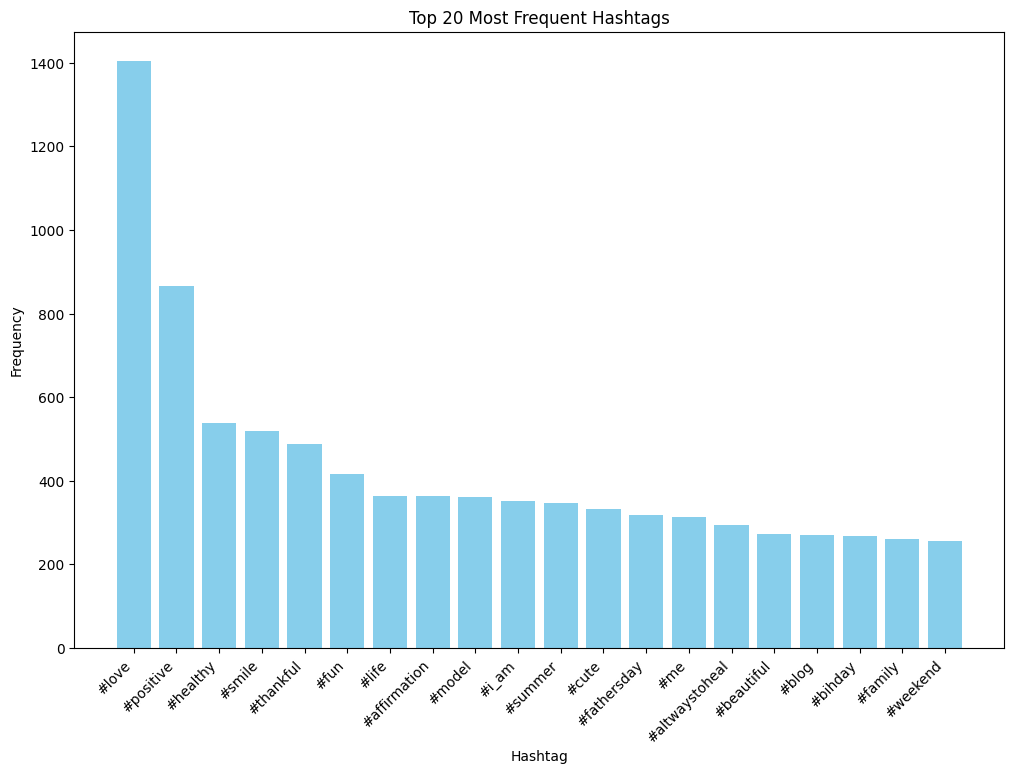

In [32]:
# Make a dataframe of regular hashtags and their count

# Create a frequency distribution of hashtags
freq_dist = FreqDist(HT_regular)

# Convert the frequency distribution to a dictionary
hashtags_dict = dict(freq_dist)

# Create a DataFrame from the dictionary
hashtags_df = pd.DataFrame({'Hashtag': list(hashtags_dict.keys()), 'Count': list(hashtags_dict.values())})

# Sort the DataFrame by count in descending order
hashtags_df = hashtags_df.sort_values(by='Count', ascending=False)

# Select the top 20 most frequent hashtags
top_20_hashtags = hashtags_df.head(20)

# Plot the frequencies of the top 20 hashtags
plt.figure(figsize=(12, 8))
plt.bar(top_20_hashtags['Hashtag'], top_20_hashtags['Count'], color='skyblue')
plt.title("Top 20 Most Frequent Hashtags")
plt.xlabel("Hashtag")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.show()

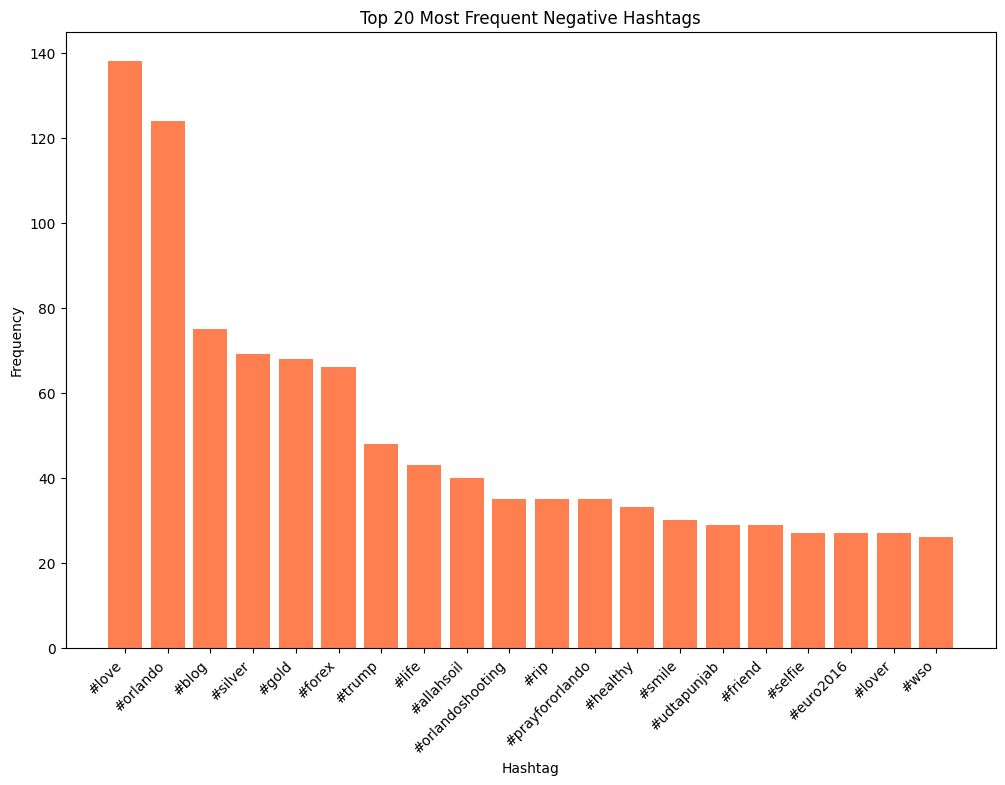

In [33]:
# Make a dataframe of negative hashtags and their count

# Create a frequency distribution of negative hashtags
freq_dist_negative = FreqDist(HT_negative)

# Convert the frequency distribution to a dictionary
hashtags_dict_negative = dict(freq_dist_negative)

# Create a DataFrame from the dictionary
hashtags_df_negative = pd.DataFrame({'Hashtag': list(hashtags_dict_negative.keys()), 'Count': list(hashtags_dict_negative.values())})

# Sort the DataFrame by count in descending order
hashtags_df_negative = hashtags_df_negative.sort_values(by='Count', ascending=False)

# Select the top 20 most frequent negative hashtags
top_20_hashtags_negative = hashtags_df_negative.head(20)

# Plot the frequencies of the top 20 negative hashtags
plt.figure(figsize=(12, 8))
plt.bar(top_20_hashtags_negative['Hashtag'], top_20_hashtags_negative['Count'], color='coral')
plt.title("Top 20 Most Frequent Negative Hashtags")
plt.xlabel("Hashtag")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.show()

### 1.2 Pre-processing and Processing

In [35]:
# tokenize the words present in the train set and then train a Word2Vec model (use seed=34)
# hint: you can use 'gensim' library

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Tokenize words in the 'tweet' column
tokenized_tweet = train['tweet'].apply(word_tokenize)

# Set the seed for reproducibility
seed = 34

# Train Word2Vec model
model_Word2Vec = Word2Vec(sentences=tokenized_tweet, seed=seed)

In [37]:
# Using the model you trained, print most similar words to 'dinner'

# Print the most similar words to 'dinner'
similar_words_to_dinner = model_Word2Vec.wv.most_similar('dinner', topn=10)

# Display the most similar words
for word, similarity in similar_words_to_dinner:
    print(f'{word}: {similarity}')

yum: 0.9625648260116577
bestfriend: 0.9620670676231384
holidays: 0.9602584838867188
delicious: 0.9595370888710022
vegas: 0.9557381272315979
lunch: 0.9543713331222534
bbq: 0.9537774920463562
lovers: 0.9530620574951172
shopping: 0.9526451230049133
gig: 0.952187716960907


In [38]:
# Using the model you trained, print most similar words to 'cancer'

# Print the most similar words to 'cancer'
similar_words_to_cancer = model_Word2Vec.wv.most_similar('cancer', topn=10)

# Display the most similar words
for word, similarity in similar_words_to_cancer:
    print(f'{word}: {similarity}')

five: 0.9730448126792908
jo: 0.9679216742515564
arm: 0.9656249284744263
eye: 0.9652900695800781
piece: 0.962405800819397
2b: 0.9623501300811768
bottle: 0.9609560966491699
truck: 0.9603418707847595
garage: 0.9601461887359619
atlanta: 0.9594113826751709


In [43]:
# Using the model you trained, print most similar words to 'apple'

# Print the most similar words to 'apple'
similar_words_to_apple = model_Word2Vec.wv.most_similar('apple', topn=10)

# Display the most similar words
for word, similarity in similar_words_to_apple:
    print(f'{word}: {similarity}')

billy: 0.9717404246330261
podcast: 0.9693377614021301
premium: 0.9682533740997314
ep: 0.9679839611053467
ball: 0.9671374559402466
recognition: 0.9660254120826721
spotify: 0.9659438729286194
11th: 0.9652346968650818
hâ¦: 0.9647395014762878
newproject: 0.964211642742157


In [44]:
# Using the model you trained, print most similar words to 'hate'

# Print the most similar words to 'hate'
similar_words_to_hate = model_Word2Vec.wv.most_similar('hate', topn=10)

# Display the most similar words
for word, similarity in similar_words_to_hate:
    print(f'{word}: {similarity}')

mean: 0.8716808557510376
understand: 0.8653848171234131
feel: 0.8495804667472839
ppl: 0.8442984819412231
because: 0.8409716486930847
dudes: 0.8371899127960205
iq: 0.8359681963920593
were: 0.8348034620285034
agree: 0.8344292044639587
still: 0.8343115448951721


In [48]:
# Removing unwanted patterns from the data
# In this part you should do any pre-processing that you think is helpful
# hint: use 'nltk' library

# In the end you must have two lists (train_corpus and test_corpus) of pre-processed tweets
# Feel free to add extra cells

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from unidecode import unidecode
import re

# Function for pre-processing a single tweet
def preprocess_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    
    # Remove non-ASCII characters and convert to closest ASCII equivalents
    tweet = unidecode(tweet)
    
    # Remove URLs, user mentions, and special characters
    tweet = re.sub(r'http\S+|www\S+|https\S+|@\w+|#\w+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    
    # Tokenize words
    words = word_tokenize(tweet)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the preprocessed words back into a single string
    tweet = ' '.join(words)
    
    return tweet

# Pre-process tweets in the train set
train_corpus = [preprocess_tweet(tweet) for tweet in train['tweet']]

# Pre-process tweets in the test set
test_corpus = [preprocess_tweet(tweet) for tweet in test['tweet']]

In [49]:
# Create BoW (bag of words) for train set
# you can use CountVectorizer with max_features=2500
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with max_features=2500
cv = CountVectorizer(max_features=2500)

# Fit and transform the train_corpus
x = cv.fit_transform(train_corpus).toarray()

# Target variable
y = train['sentiment_label']

# Display the shape of x and y
print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [61]:
# Create BoW (bag of words) for train set
# you can use CountVectorizer with max_features=2500

# Initialize CountVectorizer with max_features=2500
cv = CountVectorizer(max_features=2500)

# Fit and transform the train_corpus
x_test = cv.fit_transform(test_corpus).toarray()

# Target variable
y_test = test['sentiment_label']

# Display the shape of x_test
print(x_test.shape)
print(y_test.shape)

(17197, 2500)
(17197,)


In [52]:
# splitting the training data into train and valid sets (use seed=42)

from sklearn.model_selection import train_test_split

# Split the data into train and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

# Display the shapes of train and validation sets
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(25569, 2500)
(6393, 2500)
(25569,)
(6393,)


In [53]:
# standardize data using StandardScaler

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
sc = StandardScaler()

# Fit and transform the scaler on the training data
x_train = sc.fit_transform(x_train)

# Transform the validation and test data using the same scaler
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

### 1.3 Train Classification Models

In this part you must train these classifier models:

*   Random Forest
*   Logistic Regression
*   Decision Tree
*   SVM


For each model you must report all of the following metrics for each train, validation and test sets:

*   Accuracy
*   f1 Score
*   Confusion Matrix


**Hint:** You can use sklearn library. All of the accuracies should be more than 90%.

In [65]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_classifier.fit(x_train, y_train)

# Predictions on train and validation sets
y_train_pred_rf = rf_classifier.predict(x_train)
y_valid_pred_rf = rf_classifier.predict(x_valid)

# Metrics for the training set
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
f1_train_rf = f1_score(y_train, y_train_pred_rf, average='weighted')
confusion_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)

# Metrics for the validation set
accuracy_valid_rf = accuracy_score(y_valid, y_valid_pred_rf)
f1_valid_rf = f1_score(y_valid, y_valid_pred_rf, average='weighted')
confusion_matrix_valid_rf = confusion_matrix(y_valid, y_valid_pred_rf)

print("Random Forest Metrics:")
print("Train Accuracy:", accuracy_train_rf)
print("Train F1 Score:", f1_train_rf)
print("Train Confusion Matrix:\n", confusion_matrix_train_rf)

print("\nValidation Accuracy:", accuracy_valid_rf)
print("Validation F1 Score:", f1_valid_rf)
print("Validation Confusion Matrix:\n", confusion_matrix_valid_rf)

Random Forest Metrics:
Train Accuracy: 0.9851773632132661
Train F1 Score: 0.9851989176673526
Train Confusion Matrix:
 [[ 4728    90    14]
 [   15  9948    57]
 [    3   200 10514]]

Validation Accuracy: 0.8610980760206476
Validation F1 Score: 0.8572079487222029
Validation Confusion Matrix:
 [[ 765  219  229]
 [  81 2335   77]
 [  89  193 2405]]


In [66]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
logreg_classifier = LogisticRegression(random_state=42)

# Train the model on the training set
logreg_classifier.fit(x_train, y_train)

# Predictions on train and validation sets
y_train_pred_logreg = logreg_classifier.predict(x_train)
y_valid_pred_logreg = logreg_classifier.predict(x_valid)

# Metrics for the training set
accuracy_train_logreg = accuracy_score(y_train, y_train_pred_logreg)
f1_train_logreg = f1_score(y_train, y_train_pred_logreg, average='weighted')
confusion_matrix_train_logreg = confusion_matrix(y_train, y_train_pred_logreg)

# Metrics for the validation set
accuracy_valid_logreg = accuracy_score(y_valid, y_valid_pred_logreg)
f1_valid_logreg = f1_score(y_valid, y_valid_pred_logreg, average='weighted')
confusion_matrix_valid_logreg = confusion_matrix(y_valid, y_valid_pred_logreg)

print("Logistic Regression Metrics:")
print("Train Accuracy:", accuracy_train_logreg)
print("Train F1 Score:", f1_train_logreg)
print("Train Confusion Matrix:\n", confusion_matrix_train_logreg)

print("\nValidation Accuracy:", accuracy_valid_logreg)
print("Validation F1 Score:", f1_valid_logreg)
print("Validation Confusion Matrix:\n", confusion_matrix_valid_logreg)

c:\Users\Hadi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Train Accuracy: 0.9221322695451524
Train F1 Score: 0.9215231471874741
Train Confusion Matrix:
 [[3995  457  380]
 [ 121 9701  198]
 [ 279  556 9882]]

Validation Accuracy: 0.8509307054590959
Validation F1 Score: 0.8483425535022736
Validation Confusion Matrix:
 [[ 791  203  219]
 [  93 2306   94]
 [ 151  193 2343]]


In [67]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_classifier.fit(x_train, y_train)

# Predictions on train and validation sets
y_train_pred_dt = dt_classifier.predict(x_train)
y_valid_pred_dt = dt_classifier.predict(x_valid)

# Metrics for the training set
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
f1_train_dt = f1_score(y_train, y_train_pred_dt, average='weighted')
confusion_matrix_train_dt = confusion_matrix(y_train, y_train_pred_dt)

# Metrics for the validation set
accuracy_valid_dt = accuracy_score(y_valid, y_valid_pred_dt)
f1_valid_dt = f1_score(y_valid, y_valid_pred_dt, average='weighted')
confusion_matrix_valid_dt = confusion_matrix(y_valid, y_valid_pred_dt)

print("Decision Tree Metrics:")
print("Train Accuracy:", accuracy_train_dt)
print("Train F1 Score:", f1_train_dt)
print("Train Confusion Matrix:\n", confusion_matrix_train_dt)

print("\nValidation Accuracy:", accuracy_valid_dt)
print("Validation F1 Score:", f1_valid_dt)
print("Validation Confusion Matrix:\n", confusion_matrix_valid_dt)

Decision Tree Metrics:
Train Accuracy: 0.9852164730728616
Train F1 Score: 0.9852370795133689
Train Confusion Matrix:
 [[ 4748    73    11]
 [   31  9949    40]
 [    8   215 10494]]

Validation Accuracy: 0.8360707023306742
Validation F1 Score: 0.8341762820529649
Validation Confusion Matrix:
 [[ 787  202  224]
 [ 148 2232  113]
 [ 144  217 2326]]


In [68]:
# SVM

from sklearn.svm import SVC

# Initialize SVM Classifier
svm_classifier = SVC(random_state=42)

# Train the model on the training set
svm_classifier.fit(x_train, y_train)

# Predictions on train and validation sets
y_train_pred_svm = svm_classifier.predict(x_train)
y_valid_pred_svm = svm_classifier.predict(x_valid)

# Metrics for the training set
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
f1_train_svm = f1_score(y_train, y_train_pred_svm, average='weighted')
confusion_matrix_train_svm = confusion_matrix(y_train, y_train_pred_svm)

# Metrics for the validation set
accuracy_valid_svm = accuracy_score(y_valid, y_valid_pred_svm)
f1_valid_svm = f1_score(y_valid, y_valid_pred_svm, average='weighted')
confusion_matrix_valid_svm = confusion_matrix(y_valid, y_valid_pred_svm)

print("SVM Metrics:")
print("Train Accuracy:", accuracy_train_svm)
print("Train F1 Score:", f1_train_svm)
print("Train Confusion Matrix:\n", confusion_matrix_train_svm)

print("\nValidation Accuracy:", accuracy_valid_svm)
print("Validation F1 Score:", f1_valid_svm)
print("Validation Confusion Matrix:\n", confusion_matrix_valid_svm)

SVM Metrics:
Train Accuracy: 0.9415698697641676
Train F1 Score: 0.9412658501835934
Train Confusion Matrix:
 [[ 4180   413   239]
 [   56  9802   162]
 [  123   501 10093]]

Validation Accuracy: 0.8249648052557484
Validation F1 Score: 0.8203601015830251
Validation Confusion Matrix:
 [[ 703  175  335]
 [  56 2199  238]
 [ 120  195 2372]]


###  1.4 Unbalanced Datasets and Deep Learning

The approach to this part is entirely up to you. You can use libraries or methods that you prefer. Make sure to provide an explanation for each step.  
1. Discuss potential strategies for handling an unbalanced dataset. Choose one approach, apply it to train a classifier model, and then report the accuracy and confusion matrix.

Balanced Training Set:
Accuracy: 0.9851
Confusion Matrix:
[[ 4742    78    12]
 [   28  9941    51]
 [    6   205 10506]]


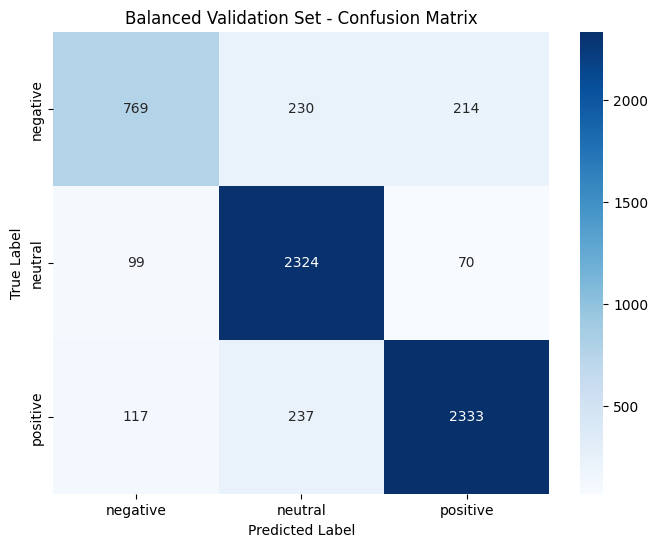

In [76]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute class weights for addressing class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Initialize and train RandomForestClassifier with balanced class weights
rf_model_balanced = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)
rf_model_balanced.fit(x_train, y_train)

# Predictions and metrics for the balanced model on the training set
y_train_pred_balanced = rf_model_balanced.predict(x_train)
accuracy_train_balanced = accuracy_score(y_train, y_train_pred_balanced)
cm_train_balanced = confusion_matrix(y_train, y_train_pred_balanced)

# Predictions and metrics for the balanced model on the validation set
y_valid_pred_balanced = rf_model_balanced.predict(x_valid)
accuracy_valid_balanced = accuracy_score(y_valid, y_valid_pred_balanced)
cm_valid_balanced = confusion_matrix(y_valid, y_valid_pred_balanced)

# Displaying metrics for the balanced training and validation sets
print("Balanced Training Set:")
print(f"Accuracy: {accuracy_train_balanced:.4f}")
print("Confusion Matrix:")
print(cm_train_balanced)

# Plotting confusion matrix for the balanced validation set using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_valid_balanced, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_valid), yticklabels=np.unique(y_valid))
plt.title("Balanced Validation Set - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

2. Using a deep-learning-based method to classify the tweets into two categories positive and negetive.

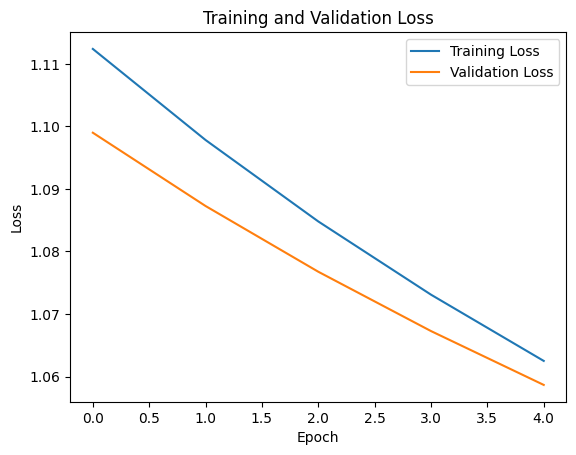

In [81]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.nn.utils.rnn import pack_padded_sequence, pad_sequence
from torchtext.vocab import GloVe
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Assuming train is your DataFrame with 'tweet' and 'sentiment_label' columns
# Replace 'train' with the actual DataFrame variable

# Preprocess the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['tweet'])
X = tokenizer.texts_to_sequences(train['tweet'])
X = pad_sequences(X)
y = LabelEncoder().fit_transform(train['sentiment_label'])

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.LongTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_valid_tensor = torch.LongTensor(X_valid)
y_valid_tensor = torch.LongTensor(y_valid)

# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        rnn_out, _ = self.rnn(embedded)
        rnn_out = rnn_out[:, -1, :]
        output = self.fc(rnn_out)
        return output

# Instantiate the model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50
hidden_dim = 100
output_dim = len(set(y))  # Adjust for the number of unique classes
model = RNNModel(vocab_size, embedding_dim, hidden_dim, output_dim)

# Define loss function and optimizer (use cross-entropy loss for multiclass)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        valid_outputs = model(X_valid_tensor)
        valid_loss = criterion(valid_outputs, y_valid_tensor)
        valid_losses.append(valid_loss.item())

# Plot training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()